# DOCUMENTAÇÃO DE DATASET(S) PARA DEEP LEARNING: **Receita Federal**


---

Integrantes:
*   André Carvalho,
*   Carlos Alberto Braga,
*   Fernanda de Souza Borges,
*   Letícia Araújo Costa,
*   Pedro Mello Antunes

## Importação de bibliotecas
- Pandas para manipulação de dados
- *numpy* e *scipy* para cálculos científicos e algébricos
- *matplotlib* e *seaborn* para geração e visualização de gráficos de diferentes tipos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")

from collections import Counter
from itertools import combinations
import warnings

warnings.filterwarnings("ignore")

<ipython-input-1-fe1e220c6045>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


## Leitura dos dados

### Serie historica


In [2]:
serie_historica_2021 = pd.read_excel('/content/ARRECADAÇÃO DAS RECEITAS FEDERAIS - 2021.xlsx')
serie_historica_2022 = pd.read_excel('/content/ARRECADAÇÃO-DAS-RECEITAS-FEDERAIS-2022.xlsx')
serie_historica_2023 = pd.read_excel('/content/ARRECADAÇÃO-DAS-RECEITAS-FEDERAIS-2023.xlsx')

In [3]:
serie_historica_2021

,RECEITAS,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ,TOTAL
0,IMPOSTO SOBRE IMPORTAÇÃO,4981,4818,6100,5074,5202,4488,4817,5017,5311,5310,5567,5386,62071
1,IMPOSTO SOBRE EXPORTAÇÃO,0,1,0,0,0,1,1,1,1,1,0,1,6
2,I.P.I-TOTAL,5954,5752,6399,5790,5590,5783,5800,6041,6738,6541,7271,7281,74940
3,I.P.I-FUMO,566,492,443,453,410,433,447,428,464,453,634,372,5593
4,I.P.I-BEBIDAS,264,269,213,178,194,222,128,208,221,227,125,134,2382
5,I.P.I-AUTOMÓVEIS,314,263,191,276,124,206,112,101,122,119,142,222,2191
6,I.P.I-VINCULADO À IMPORTAÇÃO,2361,2297,2998,2508,2601,2397,2437,2557,2735,2753,3039,3055,31736
7,I.P.I-OUTROS,2449,2433,2554,2375,2261,2527,2676,2746,3198,2988,3332,3498,33038
8,IMPOSTO SOBRE A RENDA-TOTAL,66599,35476,38911,48101,46637,42583,51599,40612,40156,53980,43040,53575,561269
9,I.RENDA-PESSOA FÍSICA,3498,1788,2853,3679,11663,5287,5079,4669,5028,4272,3872,4470,56158


In [4]:
serie_historica_2022

,RECEITAS,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ,TOTAL
0,IMPOSTO SOBRE IMPORTAÇÃO,5.354,4.571,5.170,4.126,4.675,4.292,4.914,5.556,5.341,5.345,5.133,4.678,59.156
1,IMPOSTO SOBRE EXPORTAÇÃO,0,1,0,0,0,0,0,0,0,(0),0,2,5
2,I.P.I-TOTAL,6.770,5.621,5.564,4.820,4.814,4.950,5.302,5.114,5.527,5.654,5.462,5.330,64.929
3,I.P.I-FUMO,694,483,468,542,543,560,804,440,523,563,625,486,6.729
4,I.P.I-BEBIDAS,231,188,242,128,119,110,111,106,186,166,198,262,2.046
5,I.P.I-AUTOMÓVEIS,317,186,191,203,210,346,248,260,261,315,238,205,2.980
6,I.P.I-VINCULADO À IMPORTAÇÃO,2.678,2.311,2.011,1.659,1.711,1.652,1.822,2.191,2.121,2.240,2.226,1.966,24.589
7,I.P.I-OUTROS,2.850,2.454,2.652,2.289,2.231,2.282,2.317,2.117,2.436,2.370,2.176,2.411,28.585
8,IMPOSTO SOBRE A RENDA-TOTAL,84.823,41.350,51.108,61.801,54.442,64.410,64.612,53.071,48.190,67.642,52.089,66.588,710.126
9,I.RENDA-PESSOA FÍSICA,2.707,2.731,2.813,3.607,13.627,6.334,4.610,4.713,4.583,3.968,4.338,3.832,57.865


In [5]:
serie_historica_2023

,RECEITAS,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ,TOTAL
0,IMPOSTO SOBRE IMPORTAÇÃO,4.921,3.945,4.595,4.373,4.599,4.354,4.377,4.804,4.667,4.733,4.443,4.463,54.274
1,IMPOSTO SOBRE EXPORTAÇÃO,0,0,22,1,1.014,1.440,1.075,827,44,0,(0),0,4.423
2,I.P.I-TOTAL,5.500,4.263,4.966,4.947,4.891,4.978,4.919,4.965,5.297,5.369,5.542,6.064,61.702
3,I.P.I-FUMO,783,131,169,164,181,198,204,159,170,175,190,204,2.726
4,I.P.I-BEBIDAS,220,181,203,179,186,125,158,191,249,268,285,323,2.566
5,I.P.I-AUTOMÓVEIS,230,207,287,419,311,265,368,387,344,492,420,598,4.328
6,I.P.I-VINCULADO À IMPORTAÇÃO,1.955,1.660,1.970,1.734,1.952,1.762,1.799,1.952,1.919,1.980,1.959,1.958,22.599
7,I.P.I-OUTROS,2.312,2.085,2.337,2.451,2.262,2.628,2.390,2.278,2.614,2.454,2.689,2.982,29.483
8,IMPOSTO SOBRE A RENDA-TOTAL,100.063,48.099,53.710,68.780,58.619,59.681,64.838,48.919,49.510,68.479,51.852,73.821,746.370
9,I.RENDA-PESSOA FÍSICA,2.265,2.425,2.189,2.975,15.292,6.288,5.169,4.833,4.502,4.404,4.046,4.193,58.582


### Arrecadação Estado

In [6]:
arrecadacao_estado = pd.read_excel('/content/arrecadacao-estado.xlsm')

In [7]:
arrecadacao_estado

,Ano,Mês,UF,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTACAO,IPI - OUTROS,...,REFIS,PAES,"RETENÇÃO NA FONTE - LEI 10.833, Art. 30",PAGAMENTO UNIFICADO,OUTRAS RECEITAS ADMINISTRADAS,DEMAIS RECEITAS,RECEITA PREVIDENCIÁRIA,RECEITA PREVIDENCIÁRIA - PRÓPRIA,RECEITA PREVIDENCIÁRIA - DEMAIS,ADMINISTRADAS POR OUTROS ÓRGÃOS
0,2000,Janeiro,AC,231,0,292096,0,0,167,1558,...,NaN,NaN,NaN,NaN,20911,NaN,NaN,NaN,NaN,NaN
1,2000,Janeiro,AL,475088,33873,1329338,812470,0,141735,3676847,...,NaN,NaN,NaN,NaN,127189,NaN,NaN,NaN,NaN,NaN
2,2000,Janeiro,AM,11679405,0,1507146,1791471,27796,4414483,1800346,...,NaN,NaN,NaN,NaN,187988,NaN,NaN,NaN,NaN,NaN
3,2000,Janeiro,AP,24267,0,424862,1419,321,22333,12165,...,NaN,NaN,NaN,NaN,10769,NaN,NaN,NaN,NaN,NaN
4,2000,Janeiro,BA,10476457,13,5542123,11533707,0,7496476,23743858,...,NaN,NaN,NaN,NaN,536498,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,2024,Agosto,RR,102034.67,0,0,0,6318.36,23062.09,116740.72,...,NaN,NaN,NaN,NaN,234945.68,NaN,7.838634e+07,NaN,NaN,9.439004e+05
7988,2024,Agosto,SC,1736927996,11128.29,0,8022548.91,49319114.87,680944480.4,318561501.9,...,NaN,NaN,NaN,NaN,162581913.1,NaN,2.807464e+09,NaN,NaN,5.653847e+07
7989,2024,Agosto,SP,2349051462,22738.31,2325343.81,49975750.22,206658376.5,783546444.2,1186723328,...,NaN,NaN,NaN,NaN,840584330.5,NaN,1.955525e+10,NaN,NaN,2.489258e+08
7990,2024,Agosto,SE,4517730.94,-76.37,0,2596696.57,0,1195237.09,8290727.89,...,NaN,NaN,NaN,NaN,3325071.45,NaN,2.842495e+08,NaN,NaN,4.223285e+06


## Tratamento/Limpeza/Higienização


### Serie historica


In [8]:
serie_historica_2021 = serie_historica_2021.transpose()
serie_historica_2022 = serie_historica_2022.transpose()
serie_historica_2023 = serie_historica_2023.transpose()

In [9]:
serie_historica_2021.columns = serie_historica_2021.iloc[0]
serie_historica_2021 = serie_historica_2021[1:]

serie_historica_2022.columns = serie_historica_2022.iloc[0]
serie_historica_2022 = serie_historica_2022[1:]

serie_historica_2023.columns = serie_historica_2023.iloc[0]
serie_historica_2023 = serie_historica_2023[1:]

In [10]:
# Função para tentar converter valores para float, ignorando aqueles que não são numéricos
def try_convert_to_float(x):
    try:
        return float(x)
    except (ValueError, TypeError):
        return None

# Aplicar a função aos dataframes
serie_historica_2021 = serie_historica_2021.applymap(try_convert_to_float)
serie_historica_2022 = serie_historica_2022.applymap(try_convert_to_float)
serie_historica_2023 = serie_historica_2023.applymap(try_convert_to_float)

### Arrecadação Estado

In [11]:
for column in arrecadacao_estado.columns:
  if column not in ['Mês', 'UF']:
    try:
      arrecadacao_estado[column] = pd.to_numeric(arrecadacao_estado[column], errors='coerce').fillna(0).astype(float)
    except:
      pass

In [12]:
arrecadacao_estado = arrecadacao_estado[
    arrecadacao_estado['Ano'].isin([2021, 2022, 2023])
]

In [13]:
datasets = [serie_historica_2021, serie_historica_2022, serie_historica_2023, arrecadacao_estado]
nomes = ['serie_historica_2021', 'serie_historica_2022', 'serie_historica_2023', 'arrecadacao_estado']

# Função para verificar NaN e NaT
for df, nome in zip(datasets, nomes):
    print(f'\nAnalisando o dataset {nome}:')

    # Verificar total de NaN
    total_nan = df.isna().sum().sum()
    print(f'Total de valores NaN: {total_nan}')

    # Verificar colunas com NaN
    colunas_com_nan = df.columns[df.isna().any()].tolist()
    print(f'Colunas com valores NaN: {colunas_com_nan}')

    # Verificar colunas do tipo datetime
    colunas_datetime = df.select_dtypes(include=['datetime', 'datetime64[ns]']).columns.tolist()
    if colunas_datetime:
        for col in colunas_datetime:
            total_nat = df[col].isna().sum()
            print(f'Coluna {col} possui {total_nat} valores NaT')
    else:
        print('Não há colunas do tipo datetime para verificar NaT.')


Analisando o dataset serie_historica_2021:
Total de valores NaN: 13
Colunas com valores NaN: ['CONTRIBUIÇÃO PARA O FUNDAF']
Não há colunas do tipo datetime para verificar NaT.

Analisando o dataset serie_historica_2022:
Total de valores NaN: 17
Colunas com valores NaN: ['IMPOSTO SOBRE EXPORTAÇÃO', 'CONTRIBUIÇÃO PARA O FUNDAF', 'SUBTOTAL [A]', 'ADMINISTRADAS PELA RFB [C]=[A]+[B]', 'TOTAL GERAL [E]=[C]+[D]']
Não há colunas do tipo datetime para verificar NaT.

Analisando o dataset serie_historica_2023:
Total de valores NaN: 17
Colunas com valores NaN: ['IMPOSTO SOBRE EXPORTAÇÃO', 'CONTRIBUIÇÃO PARA O FUNDAF', 'SUBTOTAL [A]', 'ADMINISTRADAS PELA RFB [C]=[A]+[B]', 'TOTAL GERAL [E]=[C]+[D]']
Não há colunas do tipo datetime para verificar NaT.

Analisando o dataset arrecadacao_estado:
Total de valores NaN: 0
Colunas com valores NaN: []
Não há colunas do tipo datetime para verificar NaT.


## Rótulos



In [14]:
# Rótulos do DataFrame serie_historica_2021
rotulos_2021 = serie_historica_2021.columns.tolist()
print("Rótulos de serie_historica_2021:")
print(rotulos_2021)

# Rótulos do DataFrame serie_historica_2022
rotulos_2022 = serie_historica_2022.columns.tolist()
print("\nRótulos de serie_historica_2022:")
print(rotulos_2022)

# Rótulos do DataFrame serie_historica_2023
rotulos_2023 = serie_historica_2023.columns.tolist()
print("\nRótulos de serie_historica_2023:")
print(rotulos_2023)

# Rótulos do DataFrame arrecadacao_estado
rotulos_estado = arrecadacao_estado.columns.tolist()
print("\nRótulos de arrecadacao_estado:")
print(rotulos_estado)

Rótulos de serie_historica_2021:
['IMPOSTO SOBRE IMPORTAÇÃO', 'IMPOSTO SOBRE EXPORTAÇÃO', 'I.P.I-TOTAL', '  I.P.I-FUMO', '  I.P.I-BEBIDAS', '  I.P.I-AUTOMÓVEIS', '  I.P.I-VINCULADO À IMPORTAÇÃO', '  I.P.I-OUTROS', 'IMPOSTO SOBRE A RENDA-TOTAL', '  I.RENDA-PESSOA FÍSICA', '  I.RENDA-PESSOA JURÍDICA', '    ENTIDADES FINANCEIRAS', '    DEMAIS EMPRESAS', '  I.RENDA-RETIDO NA FONTE', '    I.R.R.F-RENDIMENTOS DO TRABALHO', '    I.R.R.F-RENDIMENTOS DE CAPITAL', '    I.R.R.F-RENDIMENTOS DE RESIDENTES NO EXTERIOR', '    I.R.R.F-OUTROS RENDIMENTOS', 'IOF - I. S/ OPERAÇÕES FINANCEIRAS', 'ITR - I. TERRITORIAL RURAL', 'COFINS - CONTRIB. P/ A SEGURIDADE SOCIAL', '   ENTIDADES FINANCEIRAS', '   DEMAIS EMPRESAS', 'CONTRIBUIÇÃO PARA O PIS/PASEP', '   ENTIDADES FINANCEIRAS', '   DEMAIS EMPRESAS', 'CSLL - CONTRIB. SOCIAL S/ LUCRO LÍQUIDO', '   ENTIDADES FINANCEIRAS', '   DEMAIS EMPRESAS', 'CIDE-COMBUSTÍVEIS', 'CONTRIBUIÇÃO PARA O FUNDAF', 'PSS - CONTRIB. DO PLANO DE SEGURIDADE DO SERVIDOR', 'OUTRAS RECEI

## Quantitativos

In [15]:
# Describe para serie_historica_2021
print("Describe de serie_historica_2021:")
display(serie_historica_2021.describe())

# Describe para serie_historica_2022
print("\nDescribe de serie_historica_2022:")
display(serie_historica_2022.describe())

# Describe para serie_historica_2023
print("\nDescribe de serie_historica_2023:")
display(serie_historica_2023.describe())

# Describe para arrecadacao_estado
print("\nDescribe de arrecadacao_estado:")
display(arrecadacao_estado.describe())

Describe de serie_historica_2021:


RECEITAS,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,I.P.I-TOTAL,I.P.I-FUMO,I.P.I-BEBIDAS,I.P.I-AUTOMÓVEIS,I.P.I-VINCULADO À IMPORTAÇÃO,I.P.I-OUTROS,IMPOSTO SOBRE A RENDA-TOTAL,I.RENDA-PESSOA FÍSICA,...,ENTIDADES FINANCEIRAS,DEMAIS EMPRESAS,CIDE-COMBUSTÍVEIS,PSS - CONTRIB. DO PLANO DE SEGURIDADE DO SERVIDOR,OUTRAS RECEITAS ADMINISTRADAS,SUBTOTAL [A],RECEITA PREVIDENCIÁRIA [B],ADMINISTRADAS PELA RFB [C]=[A]+[B],ADMINISTRADAS POR OUTROS ÓRGÃOS [D],TOTAL GERAL [E]=[C]+[D]
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,1.300000e+01,13.00000,1.300000e+01,13.000000,1.300000e+01
mean,9549.384615,1.000000,11529.230769,860.615385,366.538462,337.153846,4882.615385,5082.692308,86349.076923,8639.692308,...,2380.000000,16833.000000,292.769231,6286.769231,4254.615385,2.016725e+05,74024.00000,2.756965e+05,13352.000000,2.890486e+05
std,15785.775055,1.581139,19061.086036,1423.504744,607.384916,561.412481,8072.582058,8408.547728,142934.628331,14464.124218,...,4072.328286,27985.696463,492.697533,10411.664470,7035.378745,3.335157e+05,122584.91017,4.559331e+05,22573.790772,4.780653e+05
min,4488.000000,0.000000,5590.000000,372.000000,125.000000,101.000000,2297.000000,2261.000000,35476.000000,1788.000000,...,652.000000,6098.000000,34.000000,3058.000000,1877.000000,8.876800e+04,35289.00000,1.246930e+05,3054.000000,1.277470e+05
25%,4981.000000,0.000000,5790.000000,433.000000,178.000000,122.000000,2437.000000,2449.000000,40612.000000,3679.000000,...,797.000000,6802.000000,38.000000,3101.000000,2225.000000,1.023290e+05,35925.00000,1.379270e+05,4161.000000,1.421060e+05
50%,5202.000000,1.000000,6041.000000,453.000000,213.000000,191.000000,2601.000000,2676.000000,46637.000000,4470.000000,...,1012.000000,7781.000000,186.000000,3166.000000,2303.000000,1.076030e+05,38937.00000,1.450780e+05,4795.000000,1.568220e+05
75%,5386.000000,1.000000,6738.000000,492.000000,227.000000,263.000000,2998.000000,3198.000000,53575.000000,5079.000000,...,1288.000000,12864.000000,244.000000,3351.000000,2536.000000,1.223140e+05,40738.00000,1.620480e+05,13930.000000,1.787420e+05
max,62071.000000,6.000000,74940.000000,5593.000000,2382.000000,2191.000000,31736.000000,33038.000000,561269.000000,56158.000000,...,15470.000000,109415.000000,1903.000000,40864.000000,27656.000000,1.310871e+06,481156.00000,1.792027e+06,86789.000000,1.878816e+06



Describe de serie_historica_2022:


RECEITAS,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,I.P.I-TOTAL,I.P.I-FUMO,I.P.I-BEBIDAS,I.P.I-AUTOMÓVEIS,I.P.I-VINCULADO À IMPORTAÇÃO,I.P.I-OUTROS,IMPOSTO SOBRE A RENDA-TOTAL,I.RENDA-PESSOA FÍSICA,...,ENTIDADES FINANCEIRAS,DEMAIS EMPRESAS,CIDE-COMBUSTÍVEIS,PSS - CONTRIB. DO PLANO DE SEGURIDADE DO SERVIDOR,OUTRAS RECEITAS ADMINISTRADAS,SUBTOTAL [A],RECEITA PREVIDENCIÁRIA [B],ADMINISTRADAS PELA RFB [C]=[A]+[B],ADMINISTRADAS POR OUTROS ÓRGÃOS [D],TOTAL GERAL [E]=[C]+[D]
count,13.000000,12.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,12.000000,13.000000,12.000000,13.000000,12.000000
mean,9.100846,0.666667,9.989000,518.286846,157.618923,229.460000,3.782846,4.397692,109.250154,8.902154,...,342.409538,22.306308,111.419000,6.100538,4.347462,127.492417,85.549077,173.831667,20.385308,184.873583
std,15.046136,1.497473,16.515022,182.908439,71.008663,85.266391,6.258407,7.270015,180.877745,14.981572,...,447.532089,37.194916,109.494512,10.103643,7.189477,18.599676,141.617414,20.714922,34.381690,24.924646
min,4.126000,0.000000,4.814000,6.729000,2.046000,2.980000,1.652000,2.117000,41.350000,2.707000,...,1.066000,7.394000,1.000000,3.012000,1.726000,102.259000,41.023000,143.282000,5.382000,148.664000
25%,4.675000,0.000000,5.114000,483.000000,111.000000,203.000000,1.822000,2.282000,52.089000,3.607000,...,1.420000,8.887000,1.000000,3.023000,2.221000,116.119750,42.613000,159.528250,6.175000,166.048500
50%,5.133000,0.000000,5.462000,542.000000,166.000000,238.000000,2.121000,2.370000,61.801000,4.338000,...,7.470000,10.192000,128.000000,3.054000,2.425000,124.620000,44.516000,168.833500,6.738000,176.677000
75%,5.345000,0.250000,5.621000,563.000000,198.000000,261.000000,2.240000,2.454000,66.588000,4.713000,...,798.000000,16.862000,218.000000,3.247000,2.555000,132.177750,45.814000,182.271250,20.191000,203.309750
max,59.156000,5.000000,64.929000,804.000000,262.000000,346.000000,24.589000,28.585000,710.126000,57.865000,...,971.000000,144.991000,243.000000,39.654000,28.258000,175.689000,556.069000,217.421000,132.505000,235.321000



Describe de serie_historica_2023:


RECEITAS,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,I.P.I-TOTAL,I.P.I-FUMO,I.P.I-BEBIDAS,I.P.I-AUTOMÓVEIS,I.P.I-VINCULADO À IMPORTAÇÃO,I.P.I-OUTROS,IMPOSTO SOBRE A RENDA-TOTAL,I.RENDA-PESSOA FÍSICA,...,ENTIDADES FINANCEIRAS,DEMAIS EMPRESAS,CIDE-COMBUSTÍVEIS,PSS - CONTRIB. DO PLANO DE SEGURIDADE DO SERVIDOR,OUTRAS RECEITAS ADMINISTRADAS,SUBTOTAL [A],RECEITA PREVIDENCIÁRIA [B],ADMINISTRADAS PELA RFB [C]=[A]+[B],ADMINISTRADAS POR OUTROS ÓRGÃOS [D],TOTAL GERAL [E]=[C]+[D]
count,13.000000,12.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,12.000000,13.000000,12.000000,13.000000,12.00000
mean,8.349846,75.162667,9.492538,210.055846,197.735846,333.256000,3.476846,4.535769,114.826231,9.012538,...,72.319462,21.119462,97.944077,6.101154,5.580000,132.821917,93.934692,183.702917,17.490154,193.17675
std,13.800694,237.138376,15.692903,179.863946,80.192238,146.192348,5.746493,7.499221,190.280002,15.268822,...,249.339575,35.243815,121.551111,10.109183,9.240402,21.152871,155.465784,24.579055,29.379849,27.99163
min,3.945000,0.000000,4.263000,2.726000,2.566000,4.328000,1.660000,2.085000,48.099000,2.189000,...,1.012000,7.738000,1.000000,2.741000,1.911000,106.992000,46.041000,153.033000,5.137000,158.99500
25%,4.377000,0.000000,4.947000,164.000000,179.000000,265.000000,1.799000,2.312000,51.852000,2.975000,...,1.076000,7.992000,1.000000,3.039000,2.672000,119.045750,47.961000,167.912750,5.749000,173.93325
50%,4.595000,1.044500,4.978000,175.000000,191.000000,344.000000,1.952000,2.451000,59.681000,4.404000,...,1.135000,8.756000,3.000000,3.111000,3.112000,124.505000,48.700000,173.729500,6.110000,179.93350
75%,4.733000,8.817250,5.500000,198.000000,249.000000,419.000000,1.959000,2.628000,68.780000,5.169000,...,3.086000,15.796000,219.000000,3.202000,3.652000,141.997500,49.096000,190.334000,15.305000,206.81725
max,54.274000,827.000000,61.702000,783.000000,323.000000,598.000000,22.599000,29.483000,746.370000,58.582000,...,902.000000,137.278000,274.000000,39.657000,36.270000,186.981000,610.575000,234.932000,113.686000,251.74500



Describe de arrecadacao_estado:


,Ano,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTACAO,IPI - OUTROS,IRPF,IRPJ - ENTIDADES FINANCEIRAS,...,REFIS,PAES,"RETENÇÃO NA FONTE - LEI 10.833, Art. 30",PAGAMENTO UNIFICADO,OUTRAS RECEITAS ADMINISTRADAS,DEMAIS RECEITAS,RECEITA PREVIDENCIÁRIA,RECEITA PREVIDENCIÁRIA - PRÓPRIA,RECEITA PREVIDENCIÁRIA - DEMAIS,ADMINISTRADAS POR OUTROS ÓRGÃOS
count,972.000000,9.720000e+02,9.720000e+02,9.720000e+02,9.720000e+02,9.720000e+02,9.720000e+02,9.720000e+02,9.720000e+02,9.720000e+02,...,972.0,972.0,972.0,972.0,9.720000e+02,972.0,9.720000e+02,972.0,972.0,9.720000e+02
mean,2022.000000,1.805560e+08,4.561760e+06,1.548265e+07,7.195859e+06,9.772028e+06,8.119784e+07,9.373003e+07,1.775775e+08,7.366513e+07,...,0.0,0.0,0.0,0.0,9.413243e+07,0.0,1.695268e+09,0.0,0.0,3.432792e+08
std,0.816917,4.366125e+08,6.144301e+07,6.958516e+07,1.230631e+07,3.331262e+07,1.749320e+08,2.274545e+08,4.056845e+08,3.000942e+08,...,0.0,0.0,0.0,0.0,2.368511e+08,0.0,3.342108e+09,0.0,0.0,1.985302e+09
min,2021.000000,0.000000e+00,-1.513574e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.522534e+04,1.844742e+06,0.000000e+00,...,0.0,0.0,0.0,0.0,-6.850772e+07,0.0,3.750561e+07,0.0,0.0,3.563566e+05
25%,2021.000000,3.483695e+05,-1.526250e+01,0.000000e+00,3.751809e+05,0.000000e+00,4.134562e+05,2.786229e+06,2.249616e+07,1.607224e+04,...,0.0,0.0,0.0,0.0,2.926995e+06,0.0,2.703195e+08,0.0,0.0,4.338742e+06
50%,2022.000000,1.469252e+07,1.221500e+01,0.000000e+00,2.049758e+06,1.236667e+04,5.867083e+06,8.721983e+06,5.268883e+07,6.931808e+05,...,0.0,0.0,0.0,0.0,1.094977e+07,0.0,6.431952e+08,0.0,0.0,1.112684e+07
75%,2023.000000,1.278379e+08,2.016737e+03,3.550150e+03,8.770030e+06,9.157163e+04,7.639717e+07,7.791685e+07,1.481155e+08,1.972009e+07,...,0.0,0.0,0.0,0.0,4.056818e+07,0.0,1.802573e+09,0.0,0.0,2.784375e+07
max,2023.000000,2.795288e+09,1.206944e+09,6.604503e+08,9.256708e+07,3.476686e+08,1.152147e+09,1.666053e+09,5.299245e+09,3.866010e+09,...,0.0,0.0,0.0,0.0,2.184149e+09,0.0,2.988109e+10,0.0,0.0,2.247643e+10


## Tipos de Dados

In [16]:
# Dtypes para serie_historica_2021
print("Dtypes de serie_historica_2021:")
print(serie_historica_2021.dtypes)

Dtypes de serie_historica_2021:
RECEITAS
IMPOSTO SOBRE IMPORTAÇÃO                             float64
IMPOSTO SOBRE EXPORTAÇÃO                             float64
I.P.I-TOTAL                                          float64
  I.P.I-FUMO                                         float64
  I.P.I-BEBIDAS                                      float64
  I.P.I-AUTOMÓVEIS                                   float64
  I.P.I-VINCULADO À IMPORTAÇÃO                       float64
  I.P.I-OUTROS                                       float64
IMPOSTO SOBRE A RENDA-TOTAL                          float64
  I.RENDA-PESSOA FÍSICA                              float64
  I.RENDA-PESSOA JURÍDICA                            float64
    ENTIDADES FINANCEIRAS                            float64
    DEMAIS EMPRESAS                                  float64
  I.RENDA-RETIDO NA FONTE                            float64
    I.R.R.F-RENDIMENTOS DO TRABALHO                  float64
    I.R.R.F-RENDIMENTOS DE CAPITAL          

In [17]:
# Dtypes para serie_historica_2022
print("\nDtypes de serie_historica_2022:")
print(serie_historica_2022.dtypes)


Dtypes de serie_historica_2022:
RECEITAS
IMPOSTO SOBRE IMPORTAÇÃO                             float64
IMPOSTO SOBRE EXPORTAÇÃO                             float64
I.P.I-TOTAL                                          float64
  I.P.I-FUMO                                         float64
  I.P.I-BEBIDAS                                      float64
  I.P.I-AUTOMÓVEIS                                   float64
  I.P.I-VINCULADO À IMPORTAÇÃO                       float64
  I.P.I-OUTROS                                       float64
IMPOSTO SOBRE A RENDA-TOTAL                          float64
  I.RENDA-PESSOA FÍSICA                              float64
  I.RENDA-PESSOA JURÍDICA                            float64
    ENTIDADES FINANCEIRAS                            float64
    DEMAIS EMPRESAS                                  float64
  I.RENDA-RETIDO NA FONTE                            float64
    I.R.R.F-RENDIMENTOS DO TRABALHO                  float64
    I.R.R.F-RENDIMENTOS DE CAPITAL         

In [18]:
# Dtypes para serie_historica_2023
print("\nDtypes de serie_historica_2023:")
print(serie_historica_2023.dtypes)


Dtypes de serie_historica_2023:
RECEITAS
IMPOSTO SOBRE IMPORTAÇÃO                             float64
IMPOSTO SOBRE EXPORTAÇÃO                             float64
I.P.I-TOTAL                                          float64
  I.P.I-FUMO                                         float64
  I.P.I-BEBIDAS                                      float64
  I.P.I-AUTOMÓVEIS                                   float64
  I.P.I-VINCULADO À IMPORTAÇÃO                       float64
  I.P.I-OUTROS                                       float64
IMPOSTO SOBRE A RENDA-TOTAL                          float64
  I.RENDA-PESSOA FÍSICA                              float64
  I.RENDA-PESSOA JURÍDICA                            float64
    ENTIDADES FINANCEIRAS                            float64
    DEMAIS EMPRESAS                                  float64
  I.RENDA-RETIDO NA FONTE                            float64
    I.R.R.F-RENDIMENTOS DO TRABALHO                  float64
    I.R.R.F-RENDIMENTOS DE CAPITAL         

In [19]:
# Dtypes para arrecadacao_estado
print("\nDtypes de arrecadacao_estado:")
print(arrecadacao_estado.dtypes)


Dtypes de arrecadacao_estado:
Ano                                                             float64
Mês                                                              object
UF                                                               object
IMPOSTO SOBRE IMPORTAÇÃO                                        float64
IMPOSTO SOBRE EXPORTAÇÃO                                        float64
IPI - FUMO                                                      float64
IPI - BEBIDAS                                                   float64
IPI - AUTOMÓVEIS                                                float64
IPI - VINCULADO À IMPORTACAO                                    float64
IPI - OUTROS                                                    float64
IRPF                                                            float64
IRPJ - ENTIDADES FINANCEIRAS                                    float64
IRPJ - DEMAIS EMPRESAS                                          float64
IRRF - RENDIMENTOS DO TRABALHO   

## Gráficos


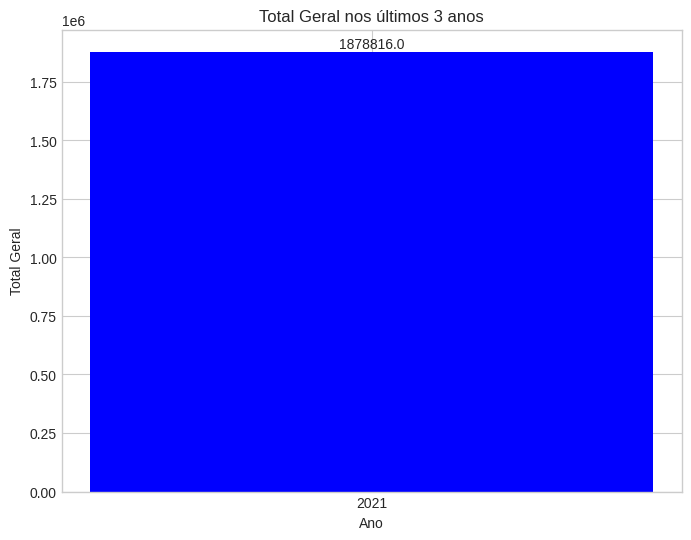

In [20]:
total_2021 = serie_historica_2021.loc['TOTAL', 'TOTAL GERAL [E]=[C]+[D]']
total_2022 = serie_historica_2022.loc['TOTAL', 'TOTAL GERAL [E]=[C]+[D]']
total_2023 = serie_historica_2023.loc['TOTAL', 'TOTAL GERAL [E]=[C]+[D]']

anos = ['2021', '2022', '2023']
totais = [total_2021, total_2022, total_2023]


plt.figure(figsize=(8, 6))
bars = plt.bar(anos, totais, color=['blue', 'green', 'red'])

# Adiciona rótulos de dados acima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.xlabel('Ano')
plt.ylabel('Total Geral')
plt.title('Total Geral nos últimos 3 anos')
plt.show()

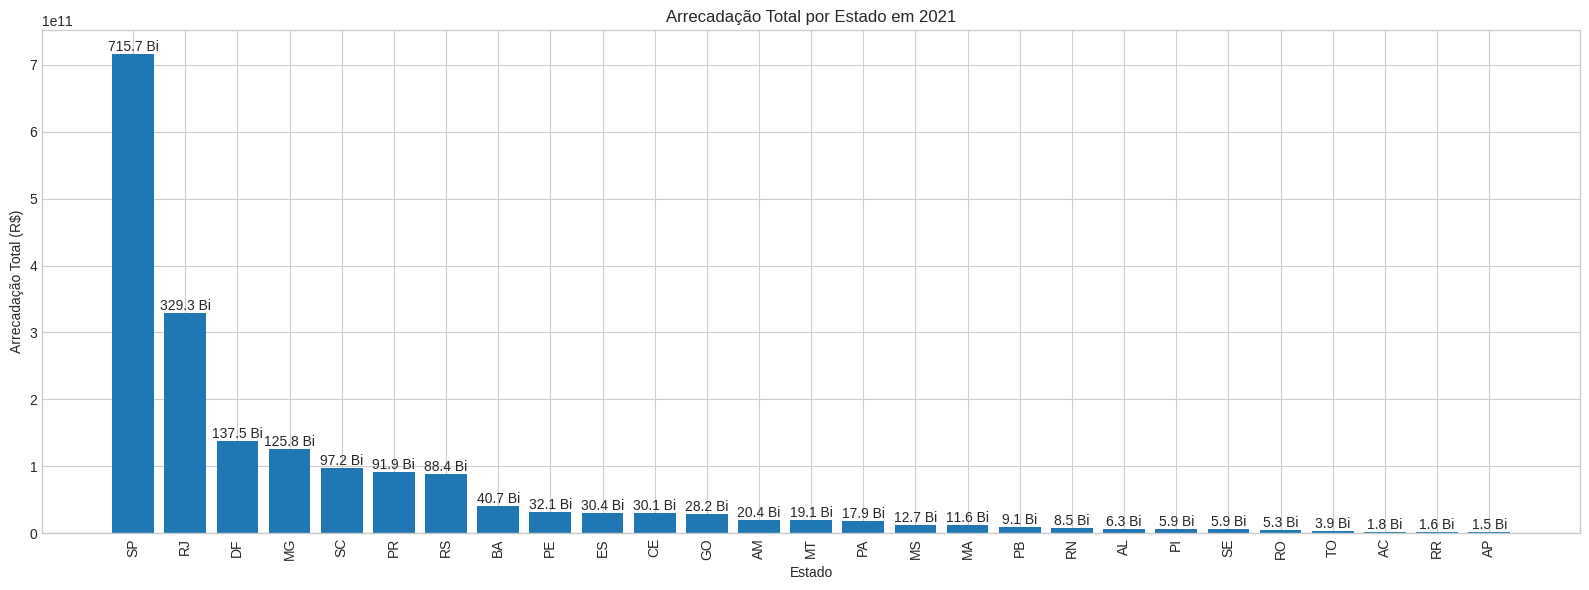

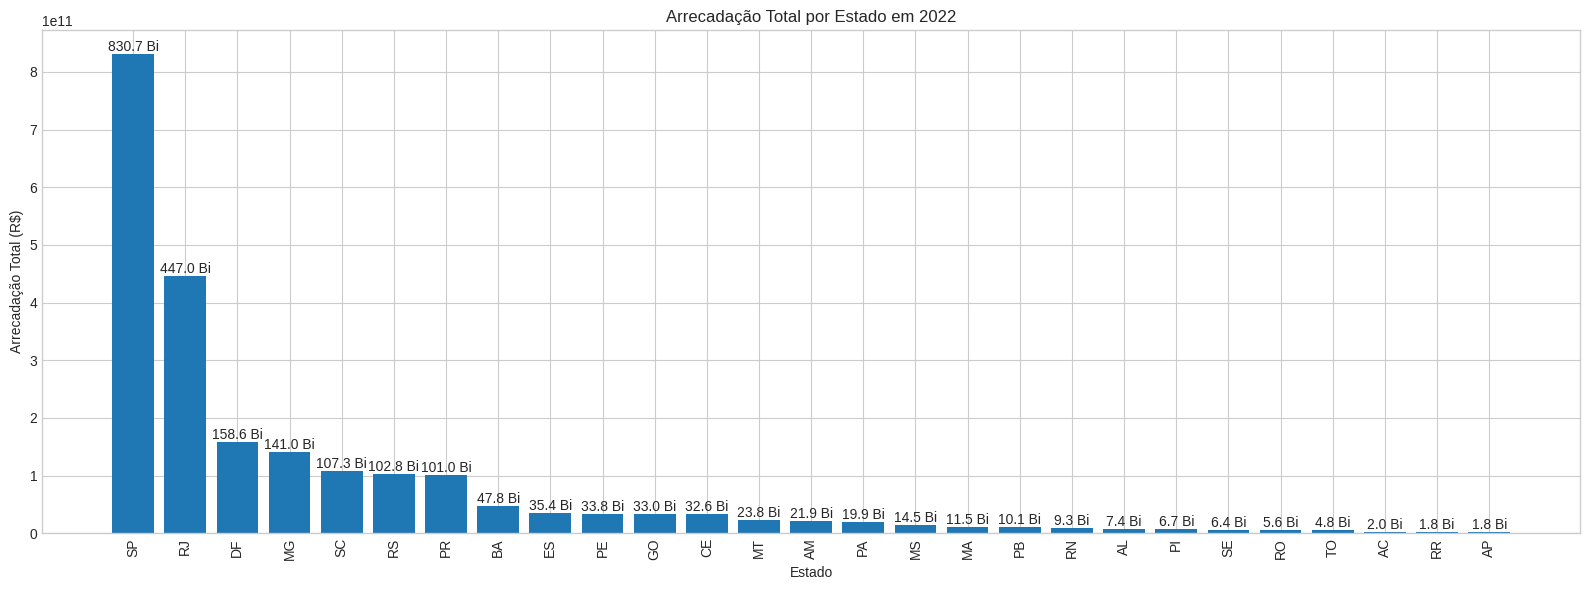

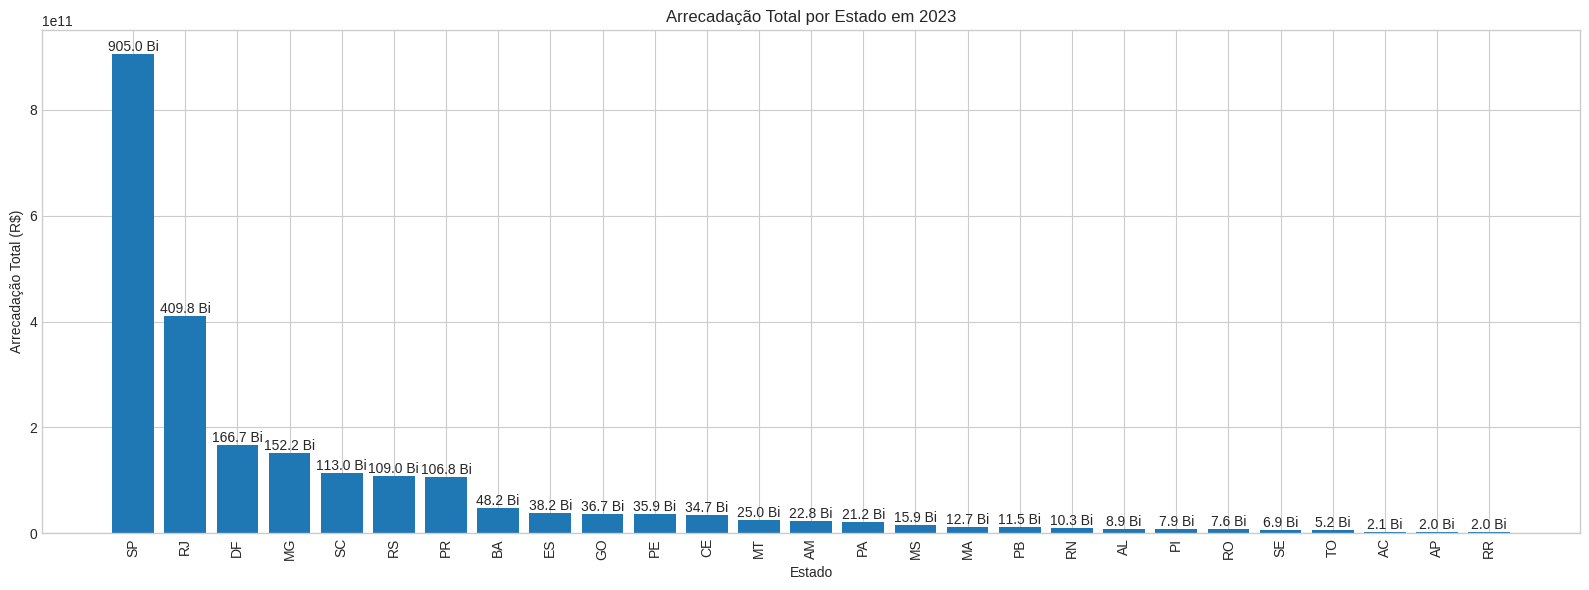

In [21]:
arrecadacao_estado['Soma Total'] = arrecadacao_estado.select_dtypes(include=np.number).sum(axis=1)

arrecadacao_por_ano_uf = arrecadacao_estado.groupby(['Ano', 'UF'])['Soma Total'].sum().unstack()

for ano in [2021, 2022, 2023]:
  plt.figure(figsize=(16, 6))
  plt.title(f'Arrecadação Total por Estado em {ano}')
  plt.xlabel('Estado')
  plt.ylabel('Arrecadação Total (R$)')
  valores = arrecadacao_por_ano_uf.loc[ano].sort_values(ascending=False)

  # Converter valores para bilhões e formatar o rótulo
  valores_bilhoes = [f'{valor/1000000000:.1f} Bi' for valor in valores]

  plt.bar(valores.index, valores.values)
  plt.xticks(rotation=90)

  # Adicionar rótulos acima das barras
  for i, v in enumerate(valores):
      plt.text(i, v, valores_bilhoes[i], ha='center', va='bottom')

  plt.tight_layout()
  plt.show()

###Evolução das Receitas Totais por Ano


<Axes: title={'center': 'Evolução das Receitas Totais por Ano'}, xlabel='Ano'>

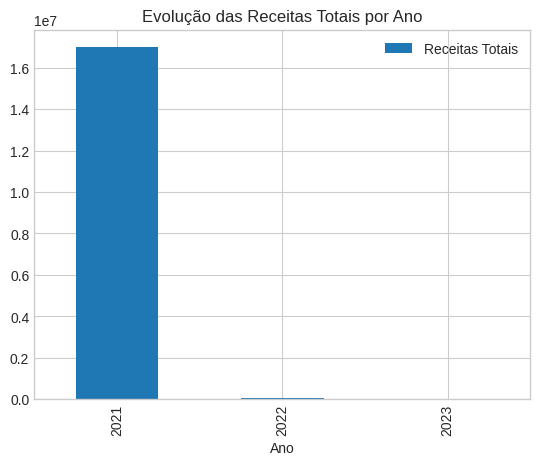

In [22]:
total_receitas_por_ano = [serie_historica_2021.sum().sum(),
                         serie_historica_2022.sum().sum(),
                         serie_historica_2023.sum().sum()]

df_agrupado_ano = pd.DataFrame({
    'Ano': ['2021', '2022', '2023'],
    'Receitas Totais': total_receitas_por_ano
})

df_agrupado_ano.plot(kind='bar', x='Ano', y='Receitas Totais', title='Evolução das Receitas Totais por Ano')

###Agrupamento por UF e Receita Previdenciária


<Axes: title={'center': 'Arrecadação Previdenciária por Estado'}, xlabel='UF'>

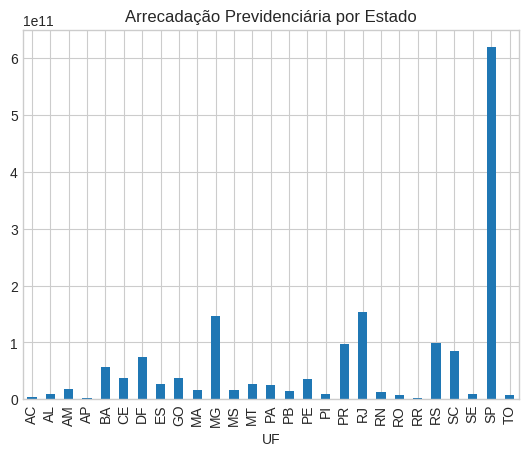

In [23]:
arrecadacao_por_estado = arrecadacao_estado.groupby('UF')['RECEITA PREVIDENCIÁRIA'].sum()

[26]
arrecadacao_por_estado = arrecadacao_estado.groupby('UF')['RECEITA PREVIDENCIÁRIA'].sum()

arrecadacao_por_estado.plot(kind='bar', title='Arrecadação Previdenciária por Estado')

arrecadacao_por_estado.plot(kind='bar', title='Arrecadação Previdenciária por Estado')

### Agrupamento por Tipo de Receita (Impostos Diretos e Indiretos)

Total de Impostos Diretos: 858627.0
Total de Impostos Indiretos: 588951.0


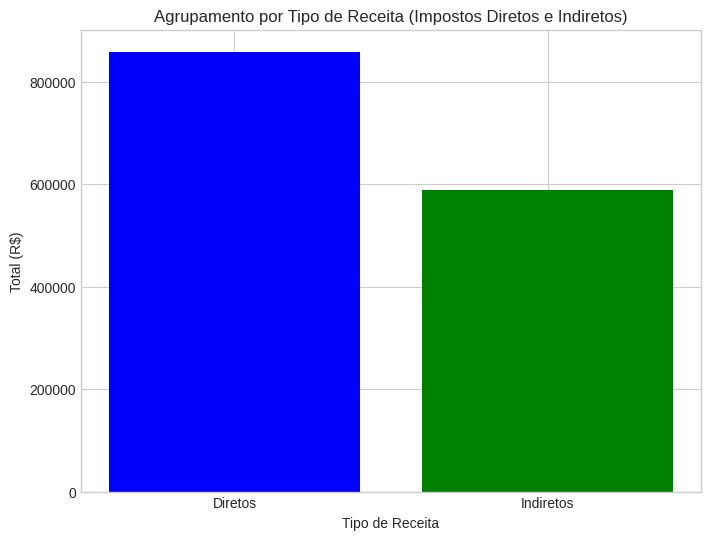

In [24]:
serie_historica_2021.columns = serie_historica_2021.columns.str.strip()

impostos_diretos = [
    'I.RENDA-PESSOA FÍSICA',
    'I.RENDA-PESSOA JURÍDICA',
    'CSLL - CONTRIB. SOCIAL S/ LUCRO LÍQUIDO'
]

impostos_indiretos = [
    'I.P.I-FUMO',
    'I.P.I-BEBIDAS',
    'COFINS - CONTRIB. P/ A SEGURIDADE SOCIAL'
]

total_diretos = serie_historica_2021[impostos_diretos].sum().sum()
total_indiretos = serie_historica_2021[impostos_indiretos].sum().sum()

print(f"Total de Impostos Diretos: {total_diretos}")
print(f"Total de Impostos Indiretos: {total_indiretos}")

tipos_receita = ['Diretos', 'Indiretos']
valores_receita = [total_diretos, total_indiretos]

plt.figure(figsize=(8, 6))
plt.bar(tipos_receita, valores_receita, color=['blue', 'green'])

plt.title('Agrupamento por Tipo de Receita (Impostos Diretos e Indiretos)')
plt.xlabel('Tipo de Receita')
plt.ylabel('Total (R$)')

plt.show()

### Historiagrama

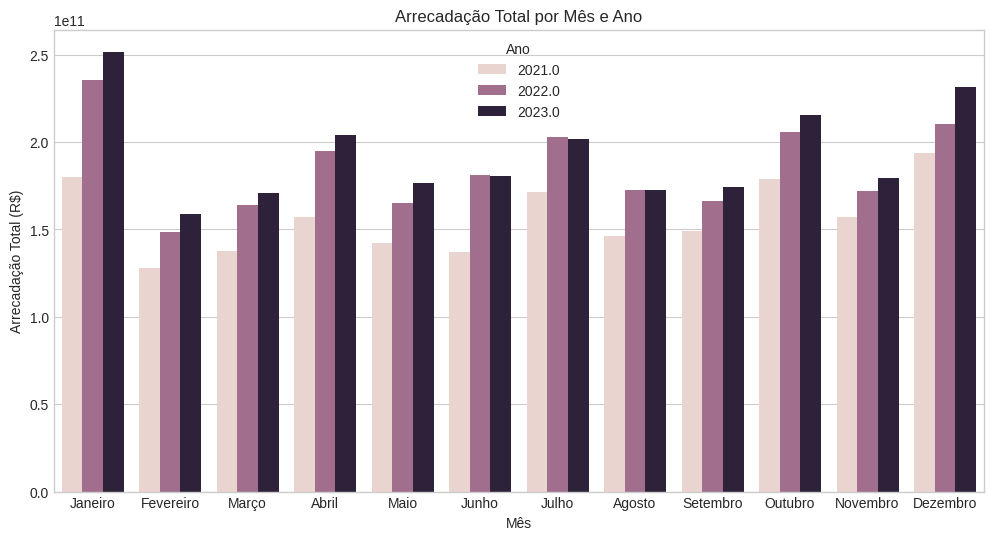

In [44]:
order_months = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
                'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

arrecadacao_estado['Mês'] = pd.Categorical(arrecadacao_estado['Mês'], categories=order_months, ordered=True)
#-----------------------------------

arrecadacao_por_mes_ano = arrecadacao_estado.groupby(['Ano', 'Mês'])['Soma Total'].sum().reset_index()

#-----------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(x='Mês', y='Soma Total', hue='Ano', data=arrecadacao_por_mes_ano)
plt.xlabel('Mês')
plt.ylabel('Arrecadação Total (R$)')
plt.title('Arrecadação Total por Mês e Ano')
plt.legend(title='Ano')
plt.show()